In [2]:
import numpy as np  # for matrix operations
import pandas as pd  # for loading CSV Files
import matplotlib.pyplot as plt # for Data Visualization

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [4]:
data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [6]:
data.shape

(1096, 5)

In [7]:
X = data.drop('Class', axis = 1)

In [8]:
y = data['Class']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# find the number of input features
X_train.shape[1]

4

In [11]:
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [12]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [14]:
# printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


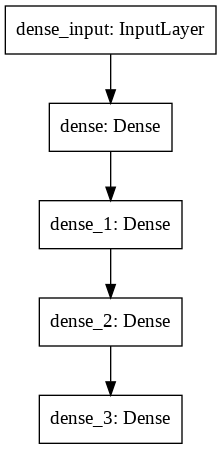

In [15]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
70/70 [==============================] - 1s 6ms/step - loss: 0.5198 - accuracy: 0.8224 - val_loss: 0.2199 - val_accuracy: 0.9830
Epoch 2/200
70/70 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9782 - val_loss: 0.0597 - val_accuracy: 0.9886
Epoch 3/200
70/70 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9974 - val_loss: 0.0234 - val_accuracy: 0.9943
Epoch 4/200
70/70 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 5/200
70/70 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 6/200
70/70 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/200
70/70 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 8/200
7

In [17]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 1.2834e-07 - accuracy: 1.0000


[1.2834092899538518e-07, 1.0]

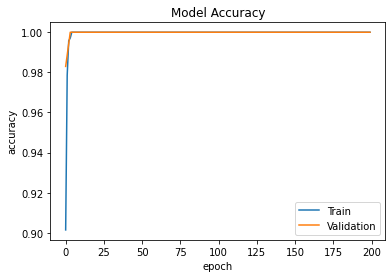

In [18]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

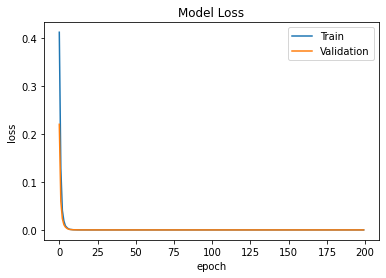

In [19]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [20]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [21]:
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


In [25]:
import sklearn.linear_model as sk

In [26]:
logreg = sk.LogisticRegressionCV()

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()

In [33]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = logreg.predict(X_test)

In [35]:
from sklearn import metrics

In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9818181818181818
